In [1]:
import os
import glob
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierredelice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()
#bd.to_csv('~/Documents/GitHub/Defunción/data/bd.csv', sep=',', index=False, header=True)
bd = df.copy()

In [3]:
#Sample data
bd = bd.sample(frac=0.1)

In [4]:
from nltk.tokenize import word_tokenize
bd['length'] = bd['nombre'].str.len()
bd['tokens'] = bd['nombre'].apply(word_tokenize)
#length of names
bd['tokens_len'] = bd['tokens'].str.len()
#bd['tokens_len'] = [len(elt.split()) for elt in bd['nombre']]
bd['tokens_len'] = bd['tokens_len'].astype('int8')
#Sexo
bd['sexo'] = bd.sexo.replace((0,9),np.nan)
#edad
bd['edad_est'] = round(((bd['fec_def'] - bd['fec_nac']))/ np.timedelta64(1, 'Y'),0)

In [5]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,892163.0,1.437605e+00,4.960919e-01,1.0,1.0,1.0,2.0,2.0
edad_c,893368.0,4.939652e+00,4.147886e-01,0.0,5.0,5.0,5.0,9.0
edad,893368.0,6.571072e+01,4.847544e+01,0.0,52.0,68.0,81.0,999.0
res_ent,893368.0,1.700944e+01,9.857685e+00,0.0,10.0,15.0,23.0,99.0
res_mun,893368.0,1.706765e+04,9.909599e+03,0.0,10012.0,15081.0,23004.0,99999.0
res_loc,893368.0,1.706767e+08,9.909636e+07,0.0,100120001.0,150810001.0,230040001.0,999999999.0
afiliacion,893368.0,9.737928e+00,2.469125e+01,0.0,1.0,2.0,7.0,99.0
edo_civil,893368.0,3.606508e+00,2.164630e+00,0.0,2.0,4.0,5.0,9.0
escolar,893368.0,3.820343e+01,2.746746e+01,0.0,31.0,32.0,51.0,122.0
def_ent,893368.0,1.650767e+01,8.257618e+00,0.0,9.0,15.0,22.0,99.0


In [45]:
#bd.describe(include='O').T

In [6]:
bd.isna().sum()

nom_c              0
sexo            1205
edad_c             0
edad               0
res_ent            0
res_mun            0
res_loc            0
curp          150145
afiliacion         0
edo_civil          0
escolar            0
ocupacion      10965
def_ent            0
def_mun            0
def_loc            0
causa_bas       1451
base               0
fec_nac         4927
fec_def          349
miscol             0
nombre             0
length             0
tokens             0
tokens_len         0
edad_est        5139
dtype: int64

In [7]:
bd[bd['nombre'].str.contains('juan')]['nombre'].value_counts()

hernandez hernandez juan        39
hernandez hernandez juana       26
garcia garcia juan              20
martinez hernandez juan         17
martinez martinez juan          16
                                ..
ordaz gomez juan                 1
santiago aparicio juan pedro     1
trujillo cruz juana              1
mendez huitzil juan              1
sebastian alvarez juana          1
Name: nombre, Length: 32348, dtype: int64

<AxesSubplot: >

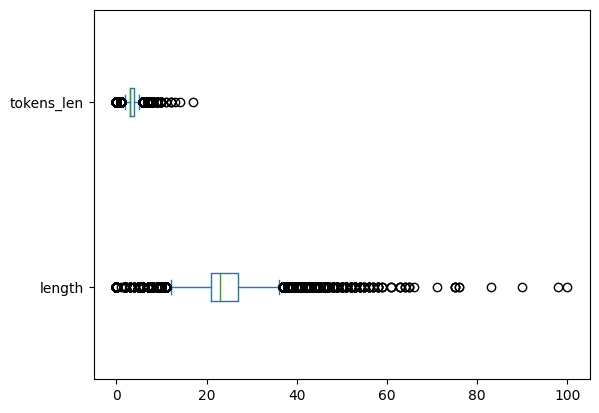

In [8]:
bd[['length','tokens_len']].plot(kind='box', vert = False)

<AxesSubplot: ylabel='Frequency'>

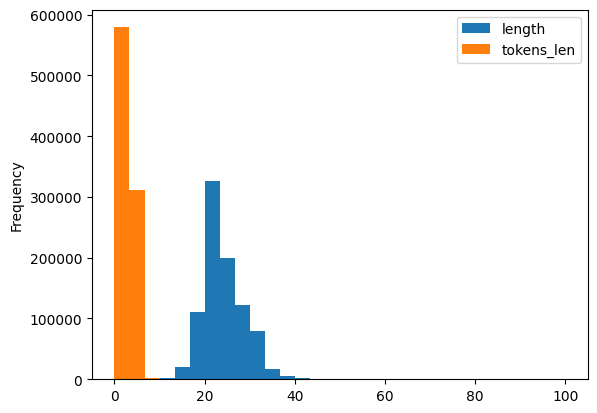

In [9]:
bd[['length','tokens_len']].plot(kind='hist', bins=30)

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
#bd['nombre'] = bd['nombre'].astype('object')

tokens = word_tokenize(str(bd['nombre']))
pos_tags = pos_tag(tokens)
named_entities = ne_chunk(pos_tags)
print(named_entities)

In [11]:
pd.crosstab(bd.tokens_len,bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
tokens_len,,,,,,,,,,,,,
0,2436,2589,2602,248,26,221,249,308,144,215,259,284,83
1,13,41,14,10,8,6,7,5,447,437,430,239,64
2,46,80,38,42,63,41,24,54,283,302,301,183,73
3,36029,35672,36479,39589,40017,41158,42670,43481,43230,45715,67521,69701,24847
4,14191,14538,15355,16494,17277,18111,19322,20114,20256,21885,31886,33883,12411
5,2679,2584,2750,2995,3006,3290,3317,3324,3382,3522,5270,5571,2046
6,760,753,809,878,927,920,1005,989,925,1008,1451,1618,564
7,124,99,126,124,137,153,158,141,124,149,197,222,70
8,19,29,27,33,32,26,28,15,25,26,29,42,14


In [12]:
#bd.groupby('base').res_ent.value_counts()
pd.crosstab(bd.res_ent, bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
res_ent,,,,,,,,,,,,,
0,0,0,0,174,177,171,178,189,139,124,83,57,30
1,548,521,512,563,558,570,605,633,640,698,986,999,439
2,1396,1488,1515,1521,1489,1675,1723,1822,1790,2116,3245,2825,1154
3,275,228,271,285,284,331,320,380,350,326,473,596,209
4,365,359,409,370,400,442,475,438,486,522,799,725,280
5,1088,1191,1348,1443,1548,1540,1577,1704,1764,1819,2895,2428,1152
6,280,328,370,352,392,427,395,460,431,473,588,712,249
7,1900,1930,2004,2122,2332,2529,2500,2630,2534,2797,3664,3977,1523
8,2115,2245,2075,2015,2079,2130,2193,2297,2500,2450,3816,3121,1288


In [17]:
bd.loc[ [bd.edad.idxmin(),df.edad.idxmax()],
    ['sexo','edad','edad_c','fec_nac', 'fec_def']
    ]

,sexo,edad,edad_c,fec_nac,fec_def
656,1.0,0,2,2010-10-19,2010-10-19
1389,2.0,44,1,2020-06-15,2020-06-15


<AxesSubplot: title={'center': 'Number of deaths per year'}, xlabel='base'>

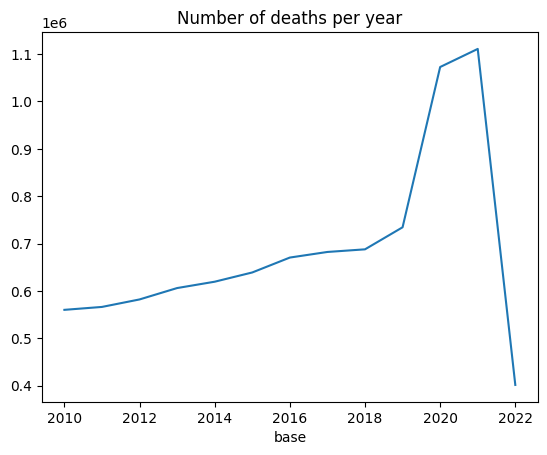

In [18]:
df.groupby('base').size().plot(title="Number of deaths per year")

#df.groupby('base').agg({'sexo': 'sum'}) \
# .plot(title="Avg. Speech Length", ylim=(0,30000))

(array([ 313794.,  195425.,  373708.,  453034.,  701081., 1108941.,
        1511292., 1776085., 1720240.,  720105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

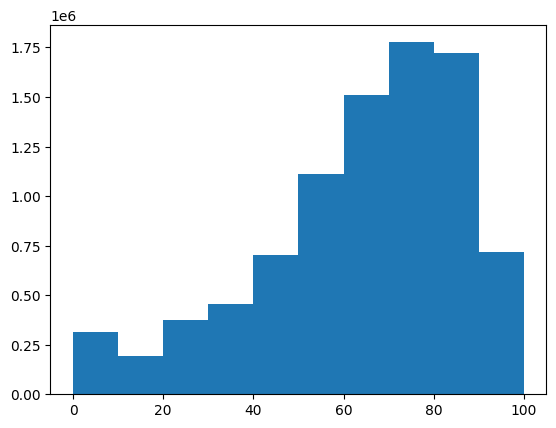

In [19]:
plt.hist(df['edad'], range=(0,100), bins=10)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_10826/1012542094.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


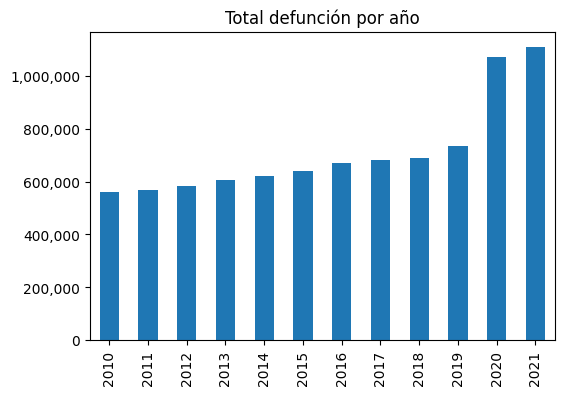

In [20]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
plt.show();